In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
%matplotlib notebook

plt.rcParams['figure.figsize'] = (6,6)
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 7})
cmap=plt.cm.get_cmap("Spectral")

In [3]:
import quandl
import pandas as pd
quandl.ApiConfig.api_key = 'YOUR KEY HERE'
def get_data(code_list):
    all_data=[]
    for each_code in code_list: 
        ary=quandl.get(f'ZILLOW/{each_code}', returns='numpy')
#         all_data[each_code]=ary
        one_df=pd.DataFrame(ary)
        one_df=one_df.rename({'Value': each_code}, axis=1)#, columns=['Date', each_code])
        one_df=one_df.set_index('Date')
        all_data.append(one_df)
    df=pd.concat(all_data, axis=1)
    return df

#Age of Inventory: Each Wednesday, age of inventory is calculated as the 
#median number of days all active listings as of that Wedne

df = get_data(['M9_MRPF3B', 'M9_MLPF3B', 'M9_DOZP', 'M9_MRP3B'])
df = df.rename(columns={"M9_MRPF3B": "Median Rent Price Per Sqft-3BR", 
                        "M9_MLPF3B": "Median Listing Price Per Sqft-3BR",
                        "M9_DOZP": "Days on Zillow", 
                        "M9_MRP3B": "Rent Price-3BR"})

drop_na_df = df.dropna()
drop_na_df.head()

,Median Rent Price Per Sqft-3BR,Median Listing Price Per Sqft-3BR,Days on Zillow,Rent Price-3BR
Date,,,,
2010-02-28,0.693662,85.618115,147.75,1000.0
2010-03-31,0.695581,85.926373,146.50,1050.0
2010-04-30,0.701439,86.198260,146.00,1100.0
2010-05-31,0.708464,84.317032,138.25,1100.0
2010-06-30,0.715197,82.862276,124.50,1100.0


<IPython.core.display.Javascript object>


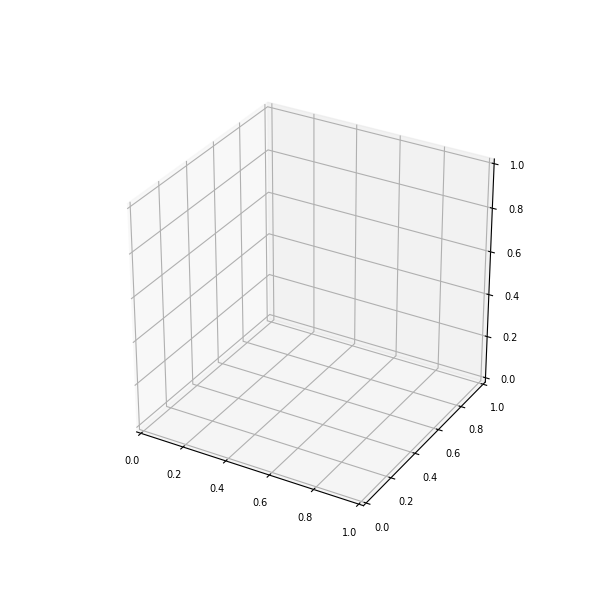

<IPython.core.display.Javascript object>


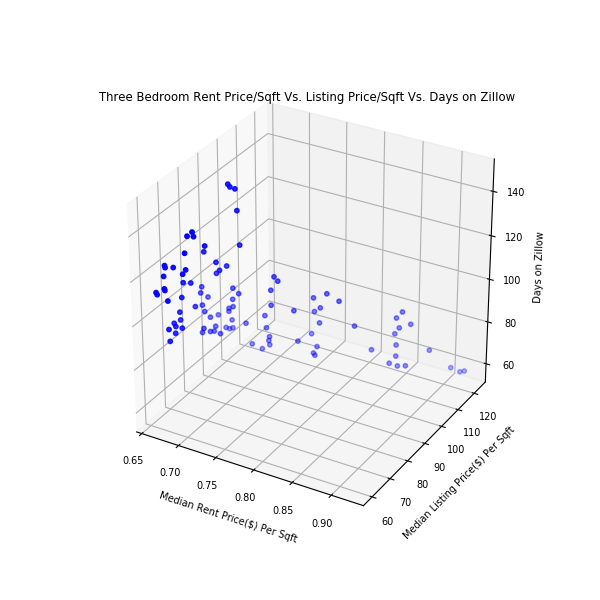

In [4]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = drop_na_df["Median Rent Price Per Sqft-3BR"].values.reshape(-1, 1)
y = drop_na_df["Median Listing Price Per Sqft-3BR"].values.reshape(-1, 1)
z = drop_na_df["Days on Zillow"].values.reshape(-1, 1)

#print("Shape: ", x.shape, y.shape, z.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Three Bedroom Rent Price/Sqft Vs. Listing Price/Sqft Vs. Days on Zillow')
ax.set_xlabel('Median Rent Price($) Per Sqft')
ax.set_ylabel('Median Listing Price($) Per Sqft')
ax.set_zlabel('Days on Zillow')

ax.scatter(x, y, z, s=10, c='b', marker='o')
plt.savefig('3DPlot-#BR.png')

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(x, y)

score = model.score(x, y)
print(f"R2 Score: {score}")

R2 Score: 0.8041579244761419


# Because the pairplot showed that the 3BR has the highest correlation to the Median Rent Price, we thought it would be interesting to make another visual. This 3D plot shows Median Rent Price per Sqft, Median List price per Sqft and Days on Zillow. The R^2 score is 0.8041579.